# Enter your details in the cells below

**Type your fullname here**: Kelvin Dankwa-Smith

**Type your email here**:kelvindankwasmith10@gmail.com

#  Project
### Problem Statement

In the year 2013, a supermarket decided to draw insight from their data in order to make data driven decisions.
As a Data Analyst,you are presented with their 2013 daily sales records (sales_data.csv) and tasked to help them find answers to the questions below by analysing the data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the sales and profit per market.
   
   iii.Which market brings more sales on the average?

2. i. What are the best 10 performing products with regards to sales in 2013?

   ii.What are the least 10 performing products with regards to sales 2013?


3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

4. i. By analyzing the data, what is the correlation between sales and discount?

   ii. Use a scatter plot to show the relationship between sales and profit.

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   
6. i. Which customer spent the most in the whole year?
   ii. What product does the customer in (i) buy the most?
   iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   
7. Can you do any other analysis to draw more insight? Feel free to do it.


**Thank you**

**GOOD LUCK!**





In [ ]:
# Use markdowns to write your answers or findings where necessary.
# Use comments to exlain you codes where necessary 
# Remember to import the necessary packages

### **NB**: To easily load the data, it's advisable to put the data and the notebook file  in the same folder

In [4]:
#import your packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


# Loading my sales data csv file to have a view of the dataset

In [5]:
# Load the sales data here
sales_data = pd.read_csv(filepath_or_buffer="C:\\Users\\user\\PycharmProjects\\Assessment project\\sales_data.csv")
print(sales_data.head(10))

   Unnamed: 0  Order Date         Order ID Customer ID    Customer Name  \
0           0  2013-01-01    ID-2013-37383    MY-18295  Muhammed Yedwab   
1           1  2013-01-01    IN-2013-47960    JE-15715       Joe Elijah   
2           2  2013-01-01    ID-2013-37383    MY-18295  Muhammed Yedwab   
3           3  2013-01-01    IN-2013-47960    JE-15715       Joe Elijah   
4           4  2013-01-01    IN-2013-47960    JE-15715       Joe Elijah   
5           5  2013-01-01  ES-2013-1430889    JK-15370       Jay Kimmel   
6           6  2013-01-01    IN-2013-77570    BO-11425    Bobby Odegard   
7           7  2013-01-01  ES-2013-5435815    LP-17095        Liz Preis   
8           8  2013-01-01    IN-2013-47960    JE-15715       Joe Elijah   
9           9  2013-01-01    ID-2013-37383    MY-18295  Muhammed Yedwab   

     Segment     City Market      Region         Category Sub-Category  \
0  Corporate   Albury   APAC     Oceania       Technology      Copiers   
1   Consumer  Tianjin   AP

In [12]:
# Searching through the database for null values, various columns available in the dataset, total memory used and data types 
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13799 non-null  int64  
 1   Order Date     13799 non-null  object 
 2   Order ID       13799 non-null  object 
 3   Customer ID    13799 non-null  object 
 4   Customer Name  13799 non-null  object 
 5   Segment        13799 non-null  object 
 6   City           13799 non-null  object 
 7   Market         13799 non-null  object 
 8   Region         13799 non-null  object 
 9   Category       13799 non-null  object 
 10  Sub-Category   13799 non-null  object 
 11  Product Name   13799 non-null  object 
 12  Sales          13799 non-null  float64
 13  Quantity       13799 non-null  int64  
 14  Discount       13799 non-null  float64
 15  Profit         13799 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 1.7+ MB
None


In [13]:
# Deleting unknown column from dataset as it is not important
sales_data.drop(sales_data.columns[0], axis=1)

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.6240
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.7000
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.4720
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.0600
4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,2013-12-31,TU-2013-9400,TM-11490,Tony Molinari,Consumer,Gaziantep,EMEA,EMEA,Furniture,Furnishings,"Eldon Light Bulb, Black",10.080,1,0.6,-5.5500
13795,2013-12-31,CA-2013-163951,CJ-11875,Carl Jackson,Corporate,Philadelphia,US,East,Office Supplies,Art,Newell 31,16.520,5,0.2,1.6520
13796,2013-12-31,US-2013-111528,JP-16135,Julie Prescott,Home Office,Los Angeles,US,West,Office Supplies,Binders,Cardinal Hold-It CD Pocket,6.384,1,0.2,2.1546
13797,2013-12-31,CA-2013-117660,BM-11785,Bryan Mills,Consumer,Columbus,US,East,Office Supplies,Labels,Avery 487,5.904,2,0.2,1.9926


# Computing average sales and profit per market

In [11]:
market_group = sales_data.groupby("Market")
avg_sales_profit = market_group[["Sales", "Profit"]].mean().sort_values(ascending=False, by="Profit")
print(avg_sales_profit)

             Sales     Profit
Market                       
Canada  180.765566  48.391132
APAC    337.225210  42.596237
EU      297.415215  38.373754
US      235.842570  31.677105
Africa  177.023796  20.623734
LATAM   198.738815  20.070383
EMEA    156.453122   8.102479


From the above we can see that the market that produces the highest profit averagely is Canada and the market that produces the average highest amount of sales is APAC

# A simple barchart diagram depicting average sales and profit per market

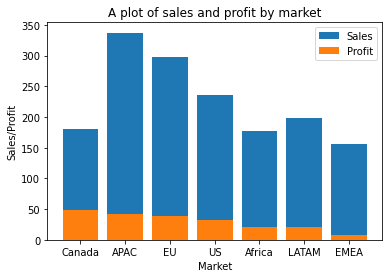

In [20]:
# Drawing a stacked barchart sales and profit by market
x = ["Canada", "APAC", "EU", "US", "Africa", "LATAM", "EMEA"]
plt.bar(x, avg_sales_profit["Sales"], label="Sales")
plt.bar(x, avg_sales_profit["Profit"], label="Profit")
plt.title("A plot of sales and profit by market")
plt.xlabel("Market")
plt.ylabel("Sales/Profit")
plt.legend()
plt.show()

From the graph we can see that Canada is the market that made the highest profit averagely ( the orange color depicts profits) whiles APAC is the market that made highest sales averagely (the blue color depicts sales)

# Which market brings more sales on the average?

In [22]:
#computing the market that brings more sales on the average
more_sales_avg = market_group["Sales"].sum().sort_values(ascending=False)
more_sales_avg.head(1)

Market
APAC    974580.8559
Name: Sales, dtype: float64

APAC market brings more sales on the average

# What are the best 10 performing products with regards to sales in 2013?

In [24]:
#grouping by product name, summing the total sales and obtain top 10 performing products after sorting values
product_group = market_group = sales_data.groupby("Product Name")["Sales"].sum()
product_group.sort_values(ascending=False).head(10)

Product Name
Motorola Smart Phone, Full Size                             29357.0982
Cisco Smart Phone, Full Size                                26737.1330
Canon imageCLASS 2200 Advanced Copier                       25899.9260
Harbour Creations Executive Leather Armchair, Adjustable    21871.1296
Apple Smart Phone, Full Size                                21120.4080
Hon Executive Leather Armchair, Adjustable                  20104.6026
Office Star Executive Leather Armchair, Adjustable          19936.1460
Nokia Smart Phone, with Caller ID                           18568.8543
Samsung Smart Phone, VoIP                                   16733.1120
Nokia Smart Phone, Full Size                                14765.8800
Name: Sales, dtype: float64

The top 10 performing products happen to be the following products above with Motorola Smart Phone, Full Size being the topmost performing product by "Sales"

# What are the least 10 performing products with regards to sales 2013?

In [25]:
product_group.sort_values(ascending=True).head(10)

Product Name
Newell 310                                     1.408
OIC #2 Pencils, Medium Soft                    1.504
Avery Durable Binders                          1.728
Maxell 4.7GB DVD+R 5/Pack                      1.980
Acco Banker's Clasps, 5 3/4"-Long              2.304
Avery 479                                      2.610
Acco 3-Hole Punch                              2.628
Eldon Spacemaker Box, Quick-Snap Lid, Clear    2.672
Newell 32                                      2.880
Crayola Anti Dust Chalk, 12/Pack               2.912
Name: Sales, dtype: float64

The least 10 performing products happen to be the following products above with Newell 310 being the least most performing product by "Sales"

# Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

In [28]:
# Locate the order date column, extract date and time from it then finally create new columns to assign new values to
order_date = sales_data["Order Date"].values
date = pd.to_datetime(sales_data['Order Date']).dt.to_period('D')
extract = date.dt.strftime('%D/%m')
sales_data['Days'] = pd.to_datetime(extract).dt.day
sales_data['Months'] = pd.to_datetime(extract).dt.month
sales_data.head(30)

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days,Months
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.21400,7,0.100,36.62400,1,1
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.28000,7,0.000,203.70000,1,1
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.56800,8,0.100,-32.47200,1,1
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.52000,6,0.000,372.06000,1,1
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.06000,7,0.000,340.41000,1,1
5,5,2013-01-01,ES-2013-1430889,JK-15370,Jay Kimmel,Consumer,Pau,EU,Central,Office Supplies,Appliances,"Hoover Toaster, Black",299.05200,4,0.100,116.29200,1,1
6,6,2013-01-01,IN-2013-77570,BO-11425,Bobby Odegard,Consumer,Suzhou,APAC,North Asia,Furniture,Bookcases,"Ikea Corner Shelving, Traditional",246.12000,2,0.000,66.42000,1,1
7,7,2013-01-01,ES-2013-5435815,LP-17095,Liz Preis,Consumer,London,EU,North,Office Supplies,Storage,"Fellowes Trays, Single Width",155.03400,3,0.100,68.90400,1,1
8,8,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Office Supplies,Storage,"Eldon Shelving, Single Width",242.25000,5,0.000,12.00000,1,1
9,9,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Office Supplies,Storage,"Fellowes Trays, Industrial",416.66400,8,0.100,41.54400,1,1


The Days and Months column have been attached to the dataframe and they are showed at the end of the table

# Show the trend of profit from January to December with a line plot.

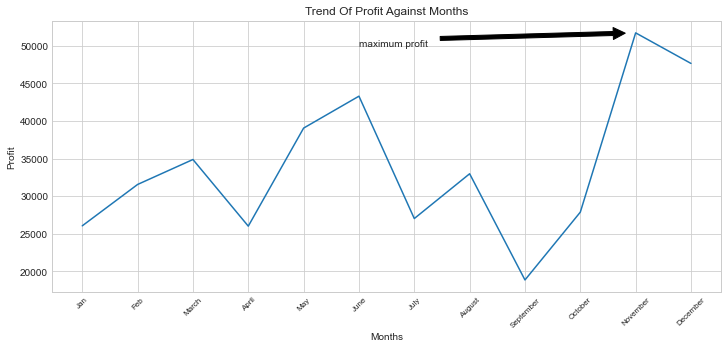

In [39]:
# Group by months and sum the profit after that make plot
group_by_months = pd.DataFrame(sales_data.groupby("Months")["Profit"].sum())
group_by_months
label = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"]
plt.figure(figsize=(12, 5))
plt.style.use("seaborn-whitegrid")
plt.plot(label, group_by_months["Profit"], label="profit")
plt.title("Trend Of Profit Against Months")
plt.xlabel("Months")
plt.ylabel("Profit")
plt.annotate("maximum profit", xy=("November", 51720.88568), xytext=("June", 50000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xticks(rotation=45, fontsize=8)
plt.show()

Maximum profit indicated with the thick arrow head in the graph and it happens to have occured in November. The month the company made most sales. 

# what 5 products are sold most in November?

In [43]:
# Obtaining 5 products sold in the month of November the most, by first grouping the data by Product name, sum their total sales and sort the values to obtain the top most 5
group_by_prod = sales_data.groupby("Product Name")[["Sales", "Months"]].sum()
group_by_prod = group_by_prod[group_by_prod["Months"] == 11]
print(group_by_prod.sort_values(ascending=False, by="Sales").head(5))

                                                       Sales  Months
Product Name                                                        
GBC DocuBind P400 Electric Binding System           5443.960      11
Cubify CubeX 3D Printer Double Head Print           4499.985      11
DMI Eclipse Executive Suite Bookcases               3406.664      11
Office Impressions End Table, 20-1/2"H x 24"W x...  3067.976      11
Hewlett-Packard Deskjet 3050a All-in-One Color ...  3040.000      11


The following products above happen to be the most products sold in the month of November with GBC DocuBind P400 Electric Binding System happening to be the product which generated most sales for the company in that period

# which day does the company make high sales on the average?

In [45]:
# groupby day, compute the average of sales (mean) and print group of day with maximum average of sales 
group_by_day = sales_data.groupby(["Days"])["Sales"].mean()
max_avg_sales_by_day = group_by_day.sort_values(ascending=False)
max_avg_sales_by_day.head(1)

Days
2    318.411526
Name: Sales, dtype: float64

Days "2" happen to be the second day of each week in the month and the average high sales were recorded in that day. 

# By analyzing the data, what is the correlation between sales and discount?

           Sales    Profit
Sales   1.000000  0.521411
Profit  0.521411  1.000000


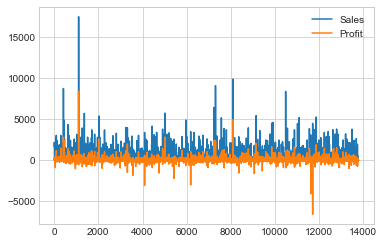

In [63]:
# retrieve sales and discount values and compute correlation between them
corr_sales_profit = sales_data[["Sales", "Profit"]]
correlation = corr_sales_profit.corr(method="pearson", min_periods=1)
corr_sales_profit.plot()
print(correlation)

Correlation happens to be the relationship between to variables and see how they move. Sales and Profit happen to be our two samples we are finding its correlation. From our results we can conclude that it is a posoitive correlation as both variables move in the same direction.

#  Use a scatter plot to show the relationship between sales and profit.

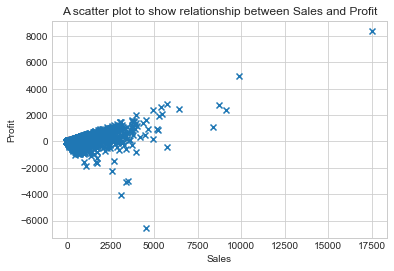

In [60]:
# computing for relationship between sales and profit with a scatter plot diagram
sales = sales_data["Sales"]
profit = sales_data["Profit"]
plt.scatter(sales, profit, marker="x")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("A scatter plot to show relationship between Sales and Profit")
plt.show()

# Which customer spent the most in the whole year?

In [64]:
# group dataset by customer name and sum sales for items in group to obtain solution
group_by_Name = sales_data.groupby("Customer Name")[["Sales"]].sum()
spent_most_year = group_by_Name.sort_values(ascending=False, by="Sales")
spent_most_year.head(15)

,Sales
Customer Name,
Tamara Chand,23190.40800
Christopher Conant,18232.88840
Laurel Beltran,16622.72232
Joe Elijah,16275.77090
Sanjit Engle,15527.93402
Susan Pistek,15384.25850
Cari MacIntyre,14137.61600
Brian Stugart,13469.04450
Zuschuss Carroll,12518.46990


From the data above it is obvious that Tamara Chand spent the most money in the whole year. I could actually print out only his details but wanted to have a view of the first 15 cutomers who spent more

# What product does the customer in (i) buy the most?

In [65]:
#compute by locating the customer by name, group by products purchased and use quantity to obtain most products
tamara = sales_data.loc[sales_data["Customer Name"] == "Tamara Chand"]
most_products_by_tamara = tamara.groupby("Product Name")[["Quantity"]].sum()
most_products_by_tamara.sort_values(ascending=False, by="Quantity").head(1)


,Quantity
Product Name,
"Sanford Markers, Water Color",9


Tamara happens to buy Sanford Markers, Water Color the most

# Which month did the customer spent the most?

In [79]:
# group by months and sum the sales for that specific month
max_month_sales = tamara.groupby("Months")[["Sales"]].max()
max_month_sales.sort_values(ascending=False, by="Sales")

,Sales
Months,
3,17499.95
11,1391.76
9,169.92
8,158.58
12,153.42
2,142.05


The 3rd month, which happens to be March was the month Tamara made the most sales

# How much did this customer spend in the whole year?

In [78]:
money_spent_year = tamara["Sales"].sum()
money_spent_year

23190.408

The customer spent 23190.408 in the whole year.